
### 1. Introduction 


The structure of the project is as follows:

- Bussiness Understanding
- Data Understanding 
- Data Modelling 
- Conclusions 

### 2.Data Understanding 

In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline 

In [4]:
#calendar dataset
df_calendar = pd.read_csv(r'C:\Users\DIGITRON\Desktop\DS_P1\calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
#listings dataset
df_listings = pd.read_csv(r'C:\Users\DIGITRON\Desktop\DS_P1\listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
#reviews 
df_reviews = pd.read_csv(r'C:\Users\DIGITRON\Desktop\DS_P1\reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### 2.1 Data Cleaning 
####  Calendar dataset

Exploring:

- Number of rows and columns
- Missing values
- Understand dataset with describe function

In [7]:
# number of rows and columns
df_calendar.shape 

(1393570, 4)

In [8]:
#number of missing rows
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [9]:
# finding porpotion of missing values in price column 
per_calendar = df_calendar['price'].isnull().sum()/df_calendar.shape[0]
print('Percentage of null values in price column of calendar dataset:', per_calendar)

Percentage of null values in price column of calendar dataset: 0.32938998399793334


In [10]:
# analysing the dataset
df_calendar.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-01-04,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [11]:
# datatypes of calendar dataset
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [12]:
# removing $ and converting price to float
df_calendar['price'] = df_calendar.price.str.replace('[$,]', '',regex=True).astype('float')

In [13]:
# fixing boolean values in calendar dataset
df_calendar['available'] = df_calendar['available']=='t'

In [14]:
#unique values per column
unique = df_calendar.nunique()
unique

listing_id    3818
date           365
available        2
price          669
dtype: int64

In [15]:
#number of missing rows 
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [16]:
# Filling Nan values in price with 0
df_calendar['price'].fillna(0,inplace=True)
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,0.0
3,241032,2016-01-07,False,0.0
4,241032,2016-01-08,False,0.0


In [17]:
min = df_calendar['date'].min()
max = df_calendar['date'].max()
print('The minimum date of the calendar dataset is: ',min), print('The maximum date of the calendar dataset is: ',max)

The minimum date of the calendar dataset is:  2016-01-04
The maximum date of the calendar dataset is:  2017-01-02


(None, None)

In [18]:
#converting the calendar datatype
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [19]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  bool          
 3   price       1393570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB


In [20]:
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month


####  Listing dataset

In [21]:
#number of rows and columns 
df_listings.shape

(3818, 92)

In [22]:
df_listings.id.nunique()

3818

In [23]:
#null values
df_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [24]:
#analysing dataset
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354321,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [25]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [26]:
# deleting columns with url since are not part of interest for our analysis
df_listings = df_listings.loc[:, ~df_listings.columns.str.endswith('url')]
df_listings.head()

,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,2.016010e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,2.016010e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [27]:
#removing $ and converting price to float
df_listings['price'] = df_listings.price.str.replace('[$,]', '',regex=True).astype('float')

In [28]:
df_listings['weekly_price'] = df_listings.weekly_price.replace('[$,]', '',regex=True).astype('float')

In [29]:
#identify columns that are all null
df_listings.columns[df_listings.isnull().all()]

Index(['license'], dtype='object')

In [30]:
#license will all null values does not have an impact in our datset, drop license

df_listings = df_listings.drop(['license'], axis=1) 

In [31]:
# finding columns that have more tha 50% of the values null 
p = df_listings.isnull().sum()/df_listings.shape[0]
df_listings.columns[p>0.5]

Index(['square_feet', 'monthly_price', 'security_deposit'], dtype='object')

In [32]:
# dropping those columns 

df_listings = df_listings.drop(['square_feet', 'monthly_price', 'security_deposit'], axis=1)

In [33]:
df_listings.shape

(3818, 80)

In [34]:
#columns that have just one value. Some of them may be description of Airbnb profile while others are just a burden
df_listings.columns[df_listings.nunique()==1]

Index(['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names'],
      dtype='object')

In [35]:
# drop columns with one value 
df_listings = df_listings.drop(['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names'], axis=1)

In [36]:
df_listings.shape

(3818, 70)

In [37]:
df_listings.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'weekly_price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       

In [38]:
df_listings['property_type'].unique()


array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [39]:
df_listings[['price','weekly_price']].head()

,price,weekly_price
0,85.0,NaN
1,150.0,1000.0
2,975.0,NaN
3,100.0,650.0
4,450.0,NaN


In [40]:
df_listings

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,9851441,Emily,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,We're located near lots of family fun. Woodlan...,NaN,NaN,31148752,Bo,...,4.0,8.0,10.0,8.0,f,strict,f,f,8,0.30
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,46566046,Glen,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,2.00
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",NaN,NaN,NaN,52791370,Virginia,...,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,25522052,Karen,...,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN


In [41]:
num_vars = df_listings.select_dtypes(include=['float', 'int']).columns
num_vars = num_vars[num_vars != ('id')]
num_vars = num_vars[num_vars != ('host_id')]
num_vars

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'weekly_price', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [42]:
#fillin na with mean value 

def fill_na_mean(df, num_vars):
    ''' 
    input:
    df - dataframe that will be given with missing values
    num_vars - object containing only numeric columns (int, float), the other columns has been dropped
    output:
    df_listings - dataframe in which the null values have been replaced with the mean of the respective columns
    
    '''
    for col in num_vars:
                df_listings[col] = df_listings[col].fillna(df_listings[col].mean(), axis=0)
          
    return df_listings

fill_na_mean(df_listings,num_vars)

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,...,10.000000,10.000000,9.000000,10.000000,f,moderate,f,f,2,4.070000
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,...,10.000000,10.000000,10.000000,10.000000,f,strict,t,t,6,1.480000
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,...,10.000000,10.000000,10.000000,10.000000,f,strict,f,f,2,1.150000
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,9851441,Emily,...,9.786709,9.809599,9.608916,9.452245,f,flexible,f,f,1,2.078919
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,...,10.000000,10.000000,9.000000,9.000000,f,strict,f,f,1,0.890000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,We're located near lots of family fun. Woodlan...,NaN,NaN,31148752,Bo,...,4.000000,8.000000,10.000000,8.000000,f,strict,f,f,8,0.300000
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,46566046,Glen,...,10.000000,10.000000,10.000000,10.000000,f,moderate,f,f,1,2.000000
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",NaN,NaN,NaN,52791370,Virginia,...,9.786709,9.809599,9.608916,9.452245,f,moderate,f,f,1,2.078919
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,25522052,Karen,...,9.786709,9.809599,9.608916,9.452245,f,moderate,f,f,1,2.078919


In [43]:
#assess missing values, checking the null values after fillin Na
num_cols = df_listings.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_listings[col].isnull().sum())

id 0
host_id 0
host_listings_count 0
host_total_listings_count 0
latitude 0
longitude 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
weekly_price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0
calculated_host_listings_count 0
reviews_per_month 0


In [44]:
# checking null values for categorical data
cat_cols = df_listings.select_dtypes(include=['object']).columns

categorical_data = df_listings.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_listings[col].isnull().sum())

name 0
summary 177
space 569
description 0
neighborhood_overview 1032
notes 1606
transit 934
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_neighbourhood 300
host_verifications 0
host_has_profile_pic 2
host_identity_verified 2
street 0
neighbourhood 416
neighbourhood_cleansed 0
neighbourhood_group_cleansed 0
city 0
state 0
zipcode 7
smart_location 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
cleaning_fee 1030
extra_people 0
calendar_updated 0
first_review 627
last_review 627
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


In [45]:
# categorical columns
cat_cols

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [46]:
#drop categorical columns for the moment, since we don't need in our analysis 
df_listings_numerical = df_listings.drop(columns=cat_cols)


In [47]:
df_listings_numerical.columns

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'weekly_price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [48]:
# property type is one of the research questions. check null values
df_listings.property_type.isnull().sum()

1

In [49]:
# since there is only one null value in the property type
# dropping it will not have any significant impact on the dataset
df_listings.dropna(subset=['property_type'], inplace=True)

In [50]:
df_listings.property_type.isnull().sum()

0

####  Review dataset

In [51]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [52]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

Reviews dataset for this level of the course does not have any impact on the price or prediction. The sentiment analysis will give us a useful information regarding positive or negative comments of the reviews.  

### Question 1: Price Prediction

In [53]:
df_listings_numerical.isnull().sum()

id                                0
host_id                           0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
weekly_price                      0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_cou

In [54]:
df_listings_numerical.isnull().sum()

id                                0
host_id                           0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
weekly_price                      0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_cou

In [55]:
X = df_listings_numerical.drop(['price'], axis=1)
y = df_listings_numerical['price']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=42)


In [57]:
#Fiting the model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

#Predict the model
y_train_predict = lm_model.predict(X_train)
y_test_predict = lm_model.predict(X_test)

#score the model

train_score = r2_score(y_train, y_train_predict)
test_score = r2_score(y_test, y_test_predict)

print("The r2score of the training data was:", train_score)
print("The r2score of the test data was:", test_score)

The r2score of the training data was: 0.6036762985284114
The r2score of the test data was: 0.6089013736226425


#### Conclusions

This section predicts the price using only numerical variables (int, float). The prediction has an r2 score of 0.6 for both the training and testing data, indicating that the predicted results are reasonably reliable.

### Question 2: Price analysis during months/years

In [58]:
df_calendar.year.unique()

array([2016, 2017], dtype=int64)

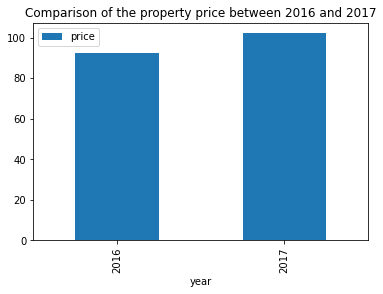

In [59]:
df_calendar.groupby(['year'])[['price']].mean().plot(kind="bar", title='Comparison of the property price between 2016 and 2017');

In [60]:
df_groupby_year = df_calendar.groupby('year')


In [61]:
df_groupby_year.nunique()

,listing_id,date,available,price,month
year,,,,,
2016,3818,363,2,667,12
2017,3818,2,2,310,1


In [62]:
df_groupby_year.size()

year
2016    1385934
2017       7636
dtype: int64

In [63]:
df_2016 = df_groupby_year.get_group(2016)


<AxesSubplot:title={'center':'Comparison of the property price between months of 2016'}, xlabel='month'>

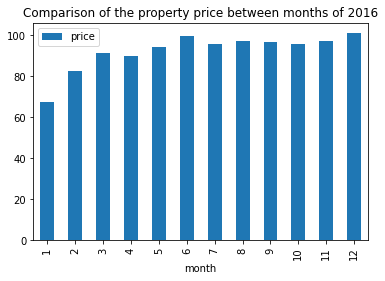

In [64]:

df_2016.groupby(['month'])[['price']].mean().plot(kind='bar', title='Comparison of the property price between months of 2016')


In [65]:
#2017 dataset have only January data. Below is represented the mean throughout the months   
mean_by_year = df_calendar.groupby(['year','month'])[['price']].mean()
mean_by_year

price
year month            
2016 1       67.365028
     2       82.308439
     3       91.233047
     4       89.683700
     5       94.281823
     6       99.453597
     7       95.377854
     8       97.181255
     9       96.612092
     10      95.444659
     11      96.879911
     12     100.958803
2017 1      102.142090

#### Conclusions

The first plot compares the price between 2016 and 2017, showing that the price in January 2017 (102.14) is higher than January 2016 (67.37$). However, the dataset only includes data from January 2017, so it may not be a reliable indicator. The second plot, which compares the property price between months of 2016, shows that prices are generally higher in June and December.

### Question 3: Which property type have higher reviews and does this affect the price? 

In [66]:
df_listings.property_type.unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

When selecting a property type, it is useful to know which ones have higher ratings and more affordable prices. To obtain this information, the mean price for each property type was calculated (using sns library) and then visually represented in a plot.

<AxesSubplot:xlabel='property_type', ylabel='price'>

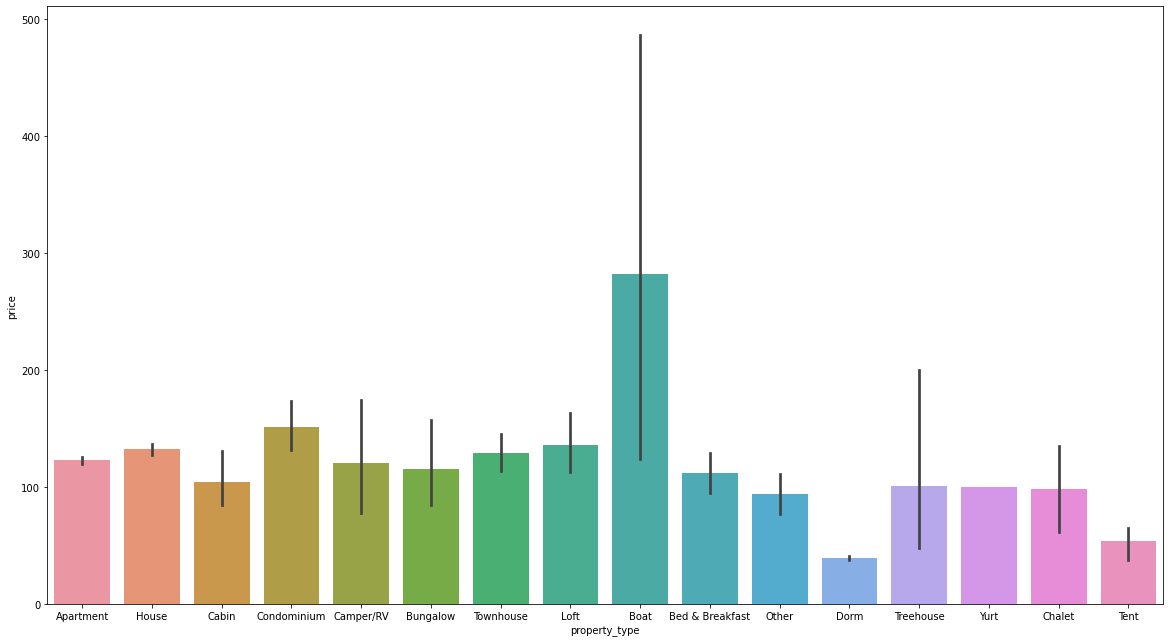

In [67]:
plt.figure(figsize=(20,11))
sns.barplot(x = 'property_type', y = 'price', data=df_listings)



From the above figure, it can be seen that the most expensive property type is a boat, while the least expensive types are a dorm, tent, chalet, and yurt

In [68]:
df_listings.groupby('property_type')['price'].mean().sort_values()

property_type
Dorm                39.500000
Tent                54.000000
Other               94.681818
Chalet              98.500000
Yurt               100.000000
Treehouse          101.000000
Cabin              104.666667
Bed & Breakfast    112.054054
Bungalow           115.615385
Camper/RV          120.461538
Apartment          122.932670
Townhouse          129.457627
House              132.351414
Loft               135.700000
Condominium        151.109890
Boat               282.375000
Name: price, dtype: float64

In addition to price, it is important to ensure that a property is comfortable, cozy, and meets all necessary requirements during the stay. One way to gauge this is to check the review scores left by previous guest. It appears that the most highly rated property types are yurts and cabins.

<AxesSubplot:xlabel='property_type', ylabel='review_scores_value'>

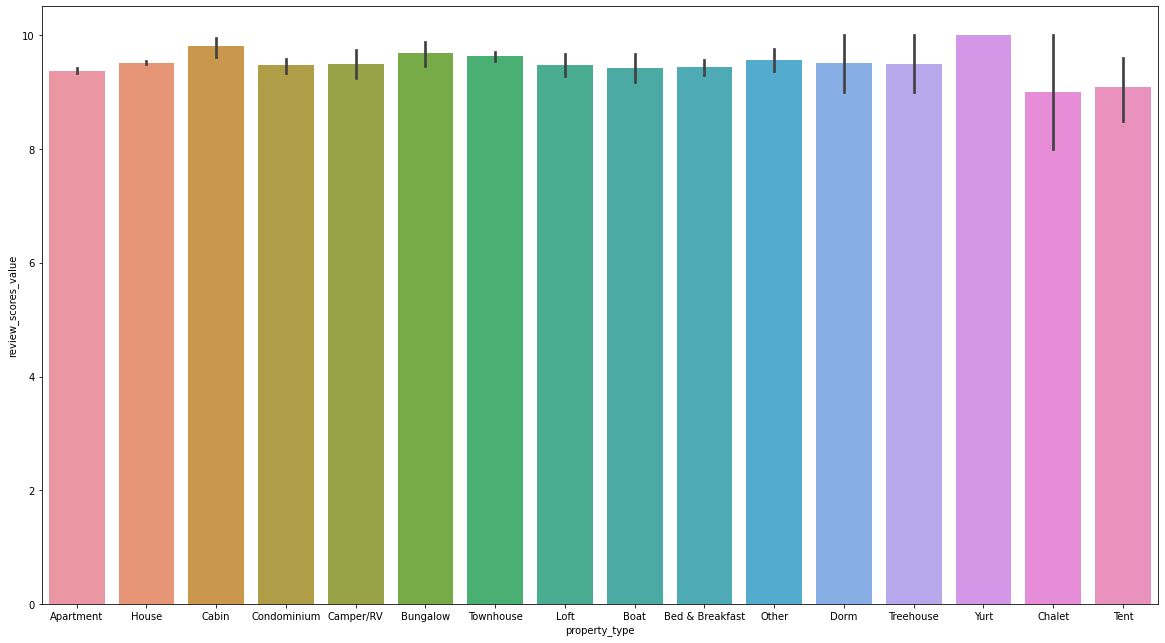

In [69]:
plt.figure(figsize=(20,11))
sns.barplot(x = 'property_type', y = 'review_scores_value', data=df_listings)

In [70]:
df_listings.groupby('property_type')['review_scores_value'].mean().sort_values()

property_type
Chalet              9.000000
Tent                9.090449
Apartment           9.373528
Boat                9.419592
Bed & Breakfast     9.431749
Condominium         9.465952
Loft                9.479143
Treehouse           9.484082
Camper/RV           9.488980
Dorm                9.500000
House               9.510516
Other               9.561670
Townhouse           9.628689
Bungalow            9.677614
Cabin               9.809524
Yurt               10.000000
Name: review_scores_value, dtype: float64

The number of reviewers can significantly impact a property's rating. Examining the number of reviewers for each property type can therefore be a useful indicator. The below figure shows that the number of people who leave reviews varies greatly between different property types. For instance, around 92 people gave feedback for cabins, while only about 6 people did so for bungalows.

<AxesSubplot:xlabel='property_type', ylabel='number_of_reviews'>

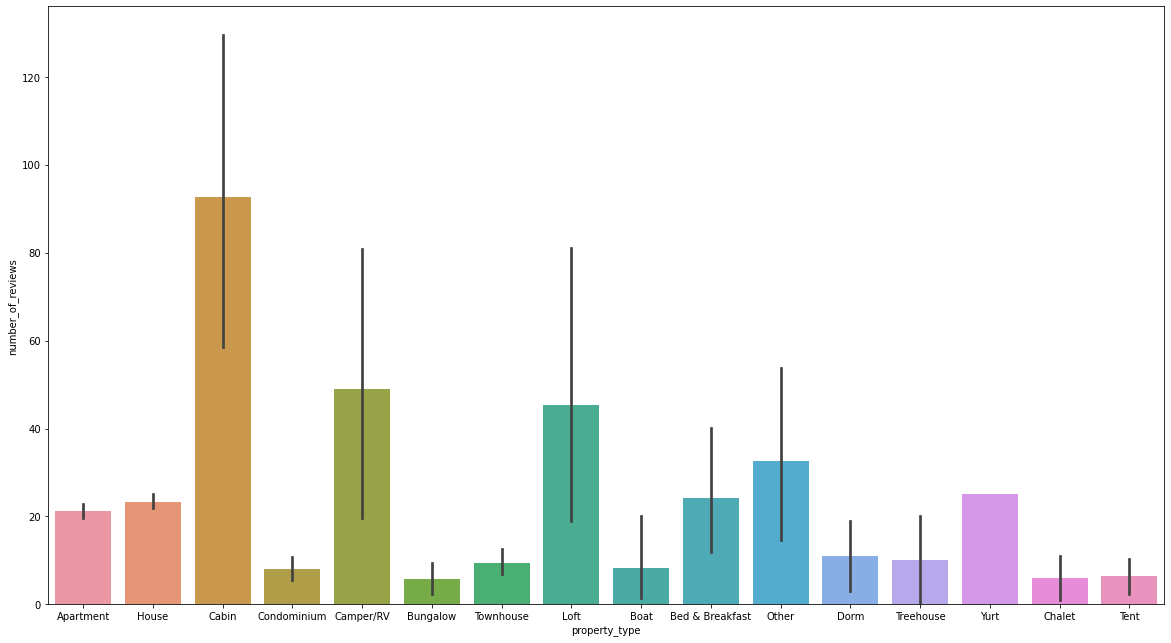

In [71]:
plt.figure(figsize=(20,11))
sns.barplot(x = 'property_type', y = 'number_of_reviews', data=df_listings)

In [72]:
df_listings.groupby('property_type')['number_of_reviews'].mean().sort_values()

property_type
Bungalow            5.692308
Chalet              6.000000
Tent                6.400000
Condominium         8.065934
Boat                8.375000
Townhouse           9.483051
Treehouse          10.000000
Dorm               11.000000
Apartment          21.213115
House              23.366994
Bed & Breakfast    24.162162
Yurt               25.000000
Other              32.681818
Loft               45.300000
Camper/RV          49.076923
Cabin              92.571429
Name: number_of_reviews, dtype: float64

### Conclusions

By considering the price, number of reviews per property, and review score, we can gain a better understanding of which properties have higher and lower prices and how price may affect reviews According to the charts, the boat is the most expensive property, with a nightly rate of approximately 282.37. It is also towards the bottom of the review_scores list. Based on review_scores, number_of_reviews, and price, the top-rated properties are Cabin, Camper, Loft, and Yurt. These properties have a price range of 100-135$ and an average review score of over 9.5. It appears that medium-priced properties have a higher number of guests, more reviews, and are also highly rated.